In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1]:
!pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/59/a8/d94e8acb59d678d908fe1db0c7ad89dfa2c2e2e529eeb3c2b3cc218a758d/keras-3.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/cd/43/b971880e2eb45c0bee2093710ae8044764a89afe9620df34a231c6f0ecd2/namex-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8f/db/e05a35451d4ba30fdc65ef168dfdc68a6939ea6afdc0101e3e77f97e1547/optree-0.11.0-cp311-cp311-win_amd64.whl.metadata
     -----

In [3]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/p

In [2]:
import keras

In [3]:
df=pd.read_csv(r'E:\Deep Learning\concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
x_org=df.drop('Strength',axis=1).values
y_org=df['Strength'].values

Text(0.5, 1.0, 'Correlation of variables')

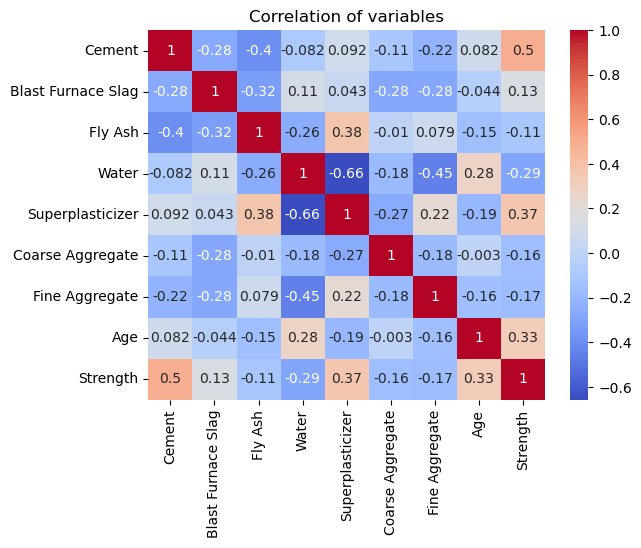

In [9]:
corr=df.corr()
sns.heatmap(corr,annot=True,xticklabels=True,yticklabels=True,cmap='coolwarm')
plt.title('Correlation of variables')

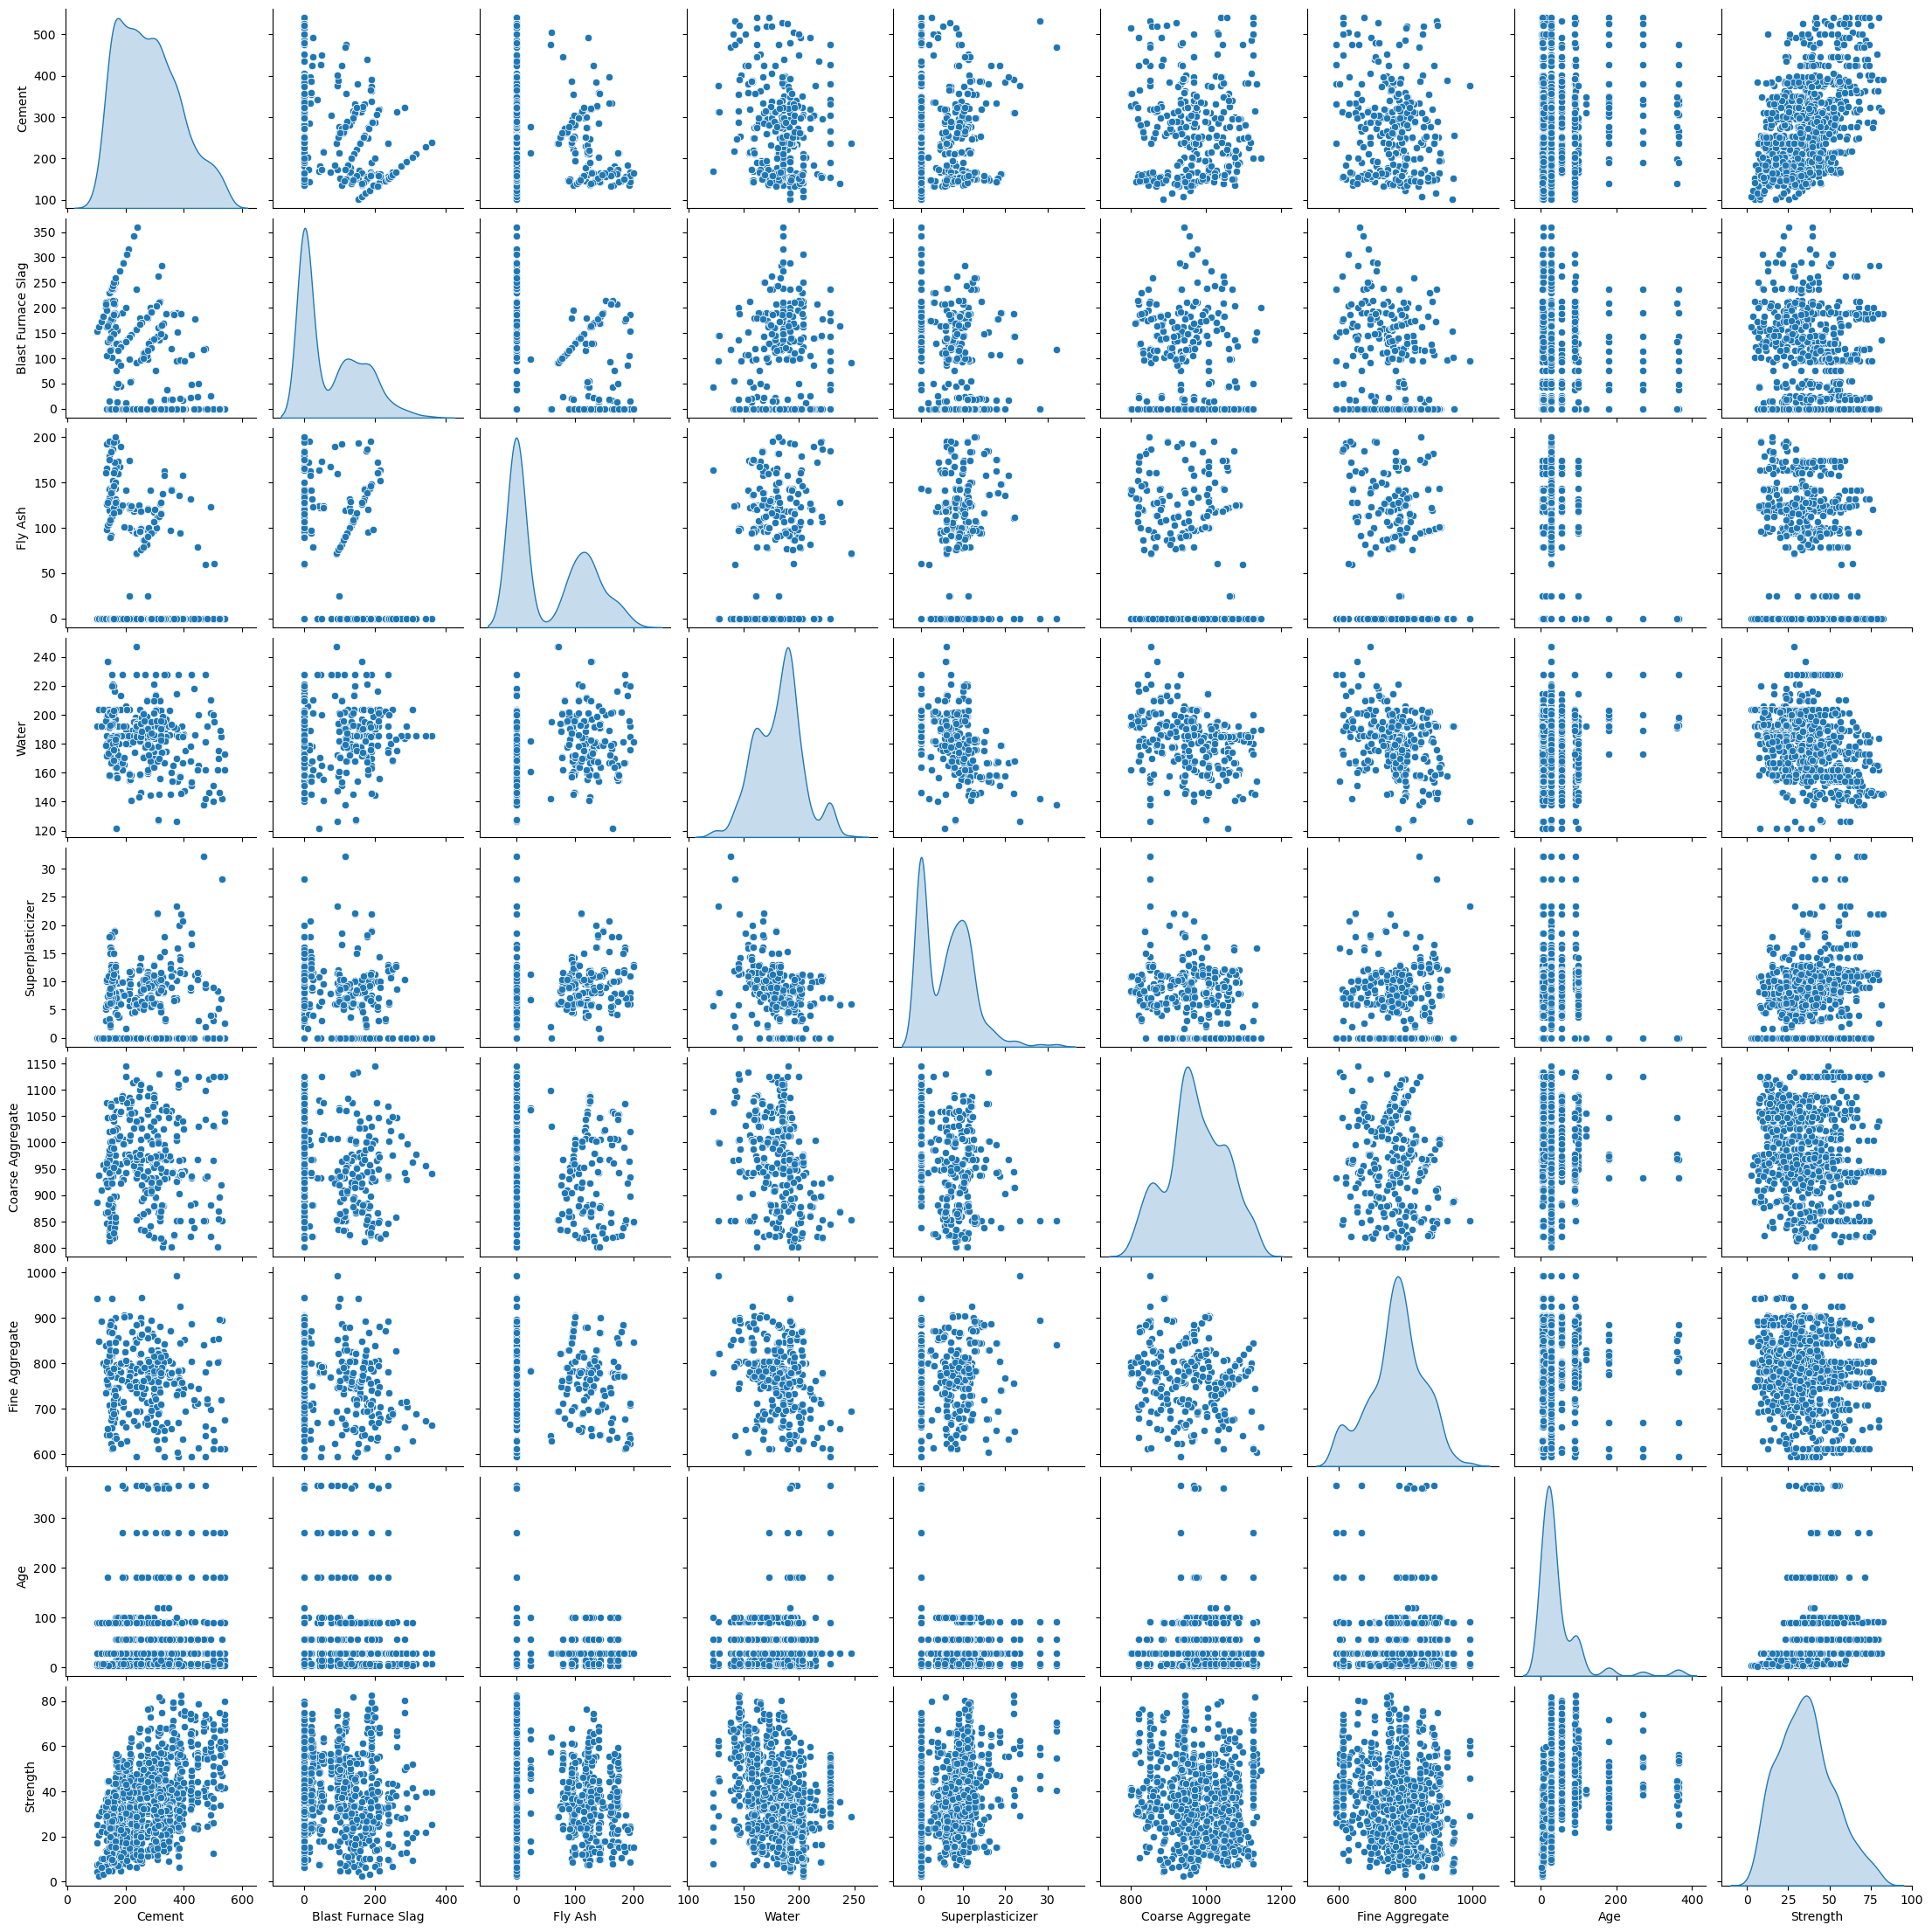

In [10]:
sns.pairplot(df,diag_kind='kde')

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_org,y_org,test_size=0.3,random_state=100)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from keras import backend

In [19]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred-y_true), axis=-1))

In [15]:
import tensorflow as tf
model=Sequential()
model.add(Dense(64,input_dim=8,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1,activation='linear'))

In [20]:
opt=keras.optimizers.Adam(learning_rate=0.0015)
model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history=model.fit(x_train,y_train,epochs=35,batch_size=32,validation_split=0.1)
print(model.summary())

Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 1572.5464 - rmse: 39.8553 - val_loss: 1533.5244 - val_rmse: 38.7347
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1451.5618 - rmse: 39.0803 - val_loss: 1503.9683 - val_rmse: 38.5663
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1463.5562 - rmse: 39.6606 - val_loss: 1469.5059 - val_rmse: 38.3636
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1345.7234 - rmse: 38.5038 - val_loss: 1430.3453 - val_rmse: 38.1191
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1250.1356 - rmse: 37.9211 - val_loss: 1410.7955 - val_rmse: 38.0910
Epoch 6/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1185.8733 - rmse: 37.1000 - val_loss: 1369.2540 - val_rmse: 37.7378
Epoch 7/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1125.1876 - rmse: 36.6054 - val_loss: 1337.2662 - val_rmse: 37.3909
Epoch 8/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1094.2600 - rmse: 36.3450 - val_loss: 1253.8704 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,325 (32.52 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 5,508 (21.52 KB)

None


In [21]:
y_predict=model.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
0.8728846602742956


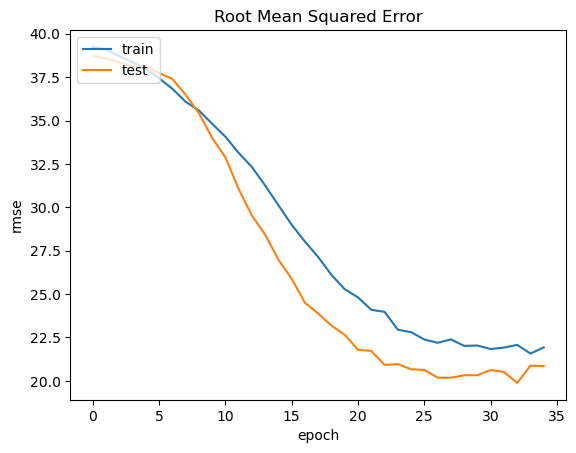

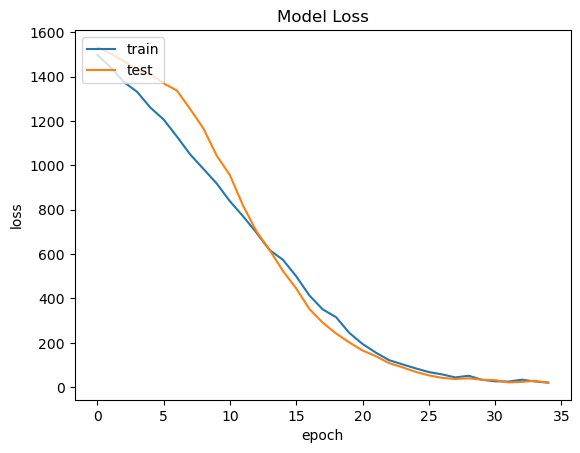

In [22]:
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()